# SENTIMENT ANALYSIS USING MACHINE LEARNING

In [1]:
# importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Projects\IMDB (Sentiment Analysis)\IMDB.csv')
df 

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,petter mattei love time money visual stun film...,positive
4,probabl alltim favorit movi stori selfless sac...,positive
...,...,...
4995,bermuda triangl told thi wast celluloid portal...,negative
4996,watch thi mst3k episod wonder mani movi thi fi...,negative
4997,bore movi poor plot poor actor movi happen roo...,negative
4998,thi bore movi audienc might stay chair fascin ...,negative


In [3]:
df.shape

(5000, 2)

In [4]:
df['sentiment'].value_counts()

positive    2500
negative    2500
Name: sentiment, dtype: int64

# Data Text Preprocessing

## 1) Remove HTML tags and square brackets

In [5]:
# Create function to remove HTML tags

def stripHTML(text):
    soup = BeautifulSoup(text, 'html.parser')  # 'html.parser' function used to remove HTML tags
    return soup.get_text()

In [6]:
stripHTML("<HI>Hi this is HTML_tags_</H1>")

'Hi this is HTML_tags_'

In [7]:
# Create function to remove square bracets

def removeSqBts(text):
    return re.sub(r'\[[^\]]*\]', '', text)

In [8]:
removeSqBts("This is a sample [text] with [square brackets] containing some information.")

'This is a sample  with  containing some information.'

In [9]:
# Create master function which is combination of 'stripHTML' & 'removeSq8Bts' function

def denoiseText(text):
    text = stripHTML(text)
    text = removeSqBts(text)
    return text

In [10]:
df['review'] = df['review'].apply(denoiseText)

## 2) Remove special characters and punctuation marks

In [11]:
# Create function to remove special characters

def removeSplCh(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [12]:
df['review'] = df['review'].apply(removeSplCh)

In [13]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,petter mattei love time money visual stun film...,positive
4,probabl alltim favorit movi stori selfless sac...,positive


## 3) Stemming 
Stemming reduces words to their base or root form, even if the root form is not a valid word and not having english dictionary meaning.

Stemming aims to remove suffixes and prefixes from words so that different forms of the same word are treated as the same word.

In [14]:
# Create function for stemming

def myStemmer(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [15]:
df['review'] = df['review'].apply(myStemmer)

In [16]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,petter mattei love time money visual stun film...,positive
4,probabl alltim favorit movi stori selfless sac...,positive


## 4) Tokenization , remove stop words and convert corpus into lower case


In [17]:
stopwordList = nltk.corpus.stopwords.words("english")
print(stopwordList)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
stop = set(stopwords.words("english"))

In [19]:
def removeStopWords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens] # '.strip' function removes extra spaces
    filteredTokens = [token for token in tokens if token.lower() not in stopwordList] # '.lower' function convert tokens into lower case
    filteredText = " ".join(filteredTokens) 
    return filteredText

In [20]:
df['review'] = df['review'].apply(removeStopWords)

In [21]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,petter mattei love time money visual stun film...,positive
4,probabl alltim favorit movi stori selfless sac...,positive


## 5) Word cloud of each category of target variable

### (I) Word Cloud of 'Positive' Sentiment

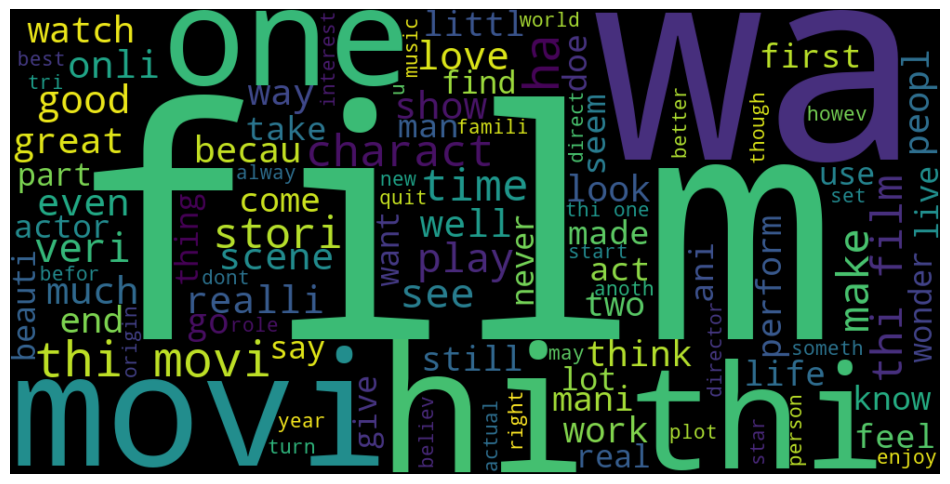

In [22]:
plt.figure(figsize=(12, 12))

dfPosReview = df[df['sentiment'] == 'positive']
posText = " ".join(review for review in dfPosReview.review)

WC = WordCloud(width=1000, height=500, max_words=100)
posWords = WC.generate(posText)

plt.imshow(posWords, interpolation="bilinear")
plt.axis('off')  # Turn off axes
plt.show()

### (II) Word Cloud of 'negative' Sentiment

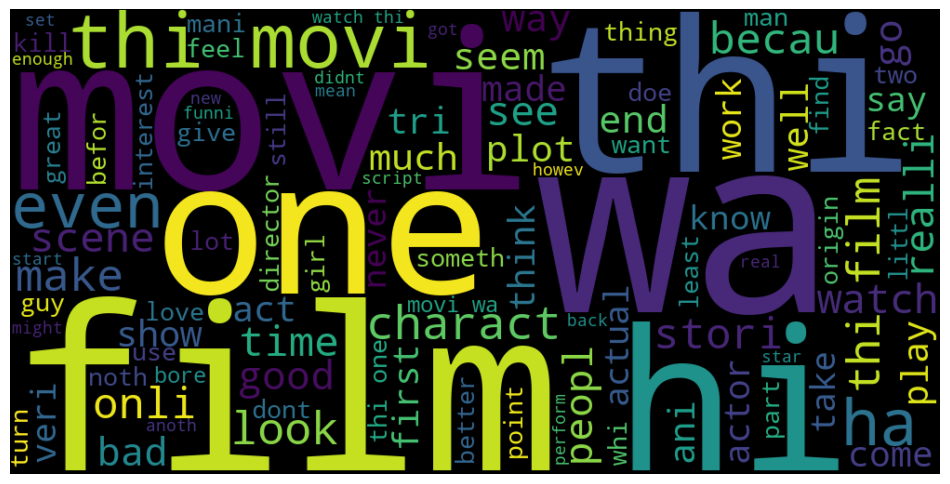

In [23]:
plt.figure(figsize=(12, 12))

dfPosReview = df[df['sentiment'] == 'negative']
posText = " ".join(review for review in dfPosReview.review)

WC = WordCloud(width=1000, height=500, max_words=100)
posWords = WC.generate(posText)

plt.imshow(posWords, interpolation="bilinear")
plt.axis('off')  # Turn off axes
plt.show()



**Some words are not valid words becuase we apply stemming before.**

**Data is cleaned now.**

## Add labels of target variables

In [24]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Category' column
df['Category_Labelled'] = label_encoder.fit_transform(df['sentiment'])

# Print the mapping of classes to encoded labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class to Label Mapping:")
for category, label in class_mapping.items():
    print(f"{category}: {label}")

Class to Label Mapping:
negative: 0
positive: 1


In [25]:
df.head()

,review,sentiment,Category_Labelled
0,one review ha mention watch 1 oz episod youll ...,positive,1
1,wonder littl product film techniqu veri unassu...,positive,1
2,thought thi wa wonder way spend time hot summe...,positive,1
3,petter mattei love time money visual stun film...,positive,1
4,probabl alltim favorit movi stori selfless sac...,positive,1


# Divide data into train and test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.Category_Labelled, test_size=0.20, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000,), (1000,), (4000,), (1000,))

# Feature Encoding using N-Gram & TF-IDF

**Built models on both techniques and selected the one that gave the better result.**

## (I) N-Gram

In [28]:
# Convert text into vectors using N-Gram

cv = CountVectorizer(
    min_df=0,  # Minimum document frequency
    max_df=1,  # Maximum document frequency
    ngram_range=(1, 3),  # (1, 3) for (unigrams, bigrams, and trigrams)
    binary=False
)

cvTrainReviews = cv.fit_transform(X_train)
cvTestReviews = cv.transform(X_test)

**The `ngram_range` parameter is a tuple of two integers, where the first integer is the minimum n-gram size and the second integer is the maximum n-gram size. The default value for `ngram_range` is (1, 1), which means that only unigrams (single words) will be extracted. If you set ngram_range to (1, 2), then unigrams and bigrams (two words in a row) will be extracted. And if you set ngram_range to (2, 2), then only bigrams will be extracted.**

**The `min_df` and `max_df` parameters in CountVectorizer control the minimum and maximum document frequencies of terms to be included in the vocabulary. The range of these parameters is between 0 and 1. A value of 0.5 means that a term must appear in at least 50% of the documents to be included in the vocabulary.**

**The `binary` parameter determines whether to use binary or integer counts for the resulting matrix. If set to True, the matrix will contain only binary values (0 or 1), indicating the presence or absence of a term in a document. If set to False (the default), the matrix will contain integer counts, indicating how many times a term appears in a document.**

In [29]:
cvTrainReviews.shape, cvTestReviews.shape

((4000, 802488), (1000, 802488))

## (II) TF-IDF

In [30]:
# Convert text into vectors using TF-IDF

tf = TfidfVectorizer(
    min_df=0,  # Minimum document frequency
    max_df=1,  # Maximum document frequency
    use_idf=True,
    ngram_range=(1, 3),  # n-gram range (e.g., unigrams, bigrams, trigrams)
    binary=False
)

tfTrainReviews = tf.fit_transform(X_train)
tfTestReviews = tf.transform(X_test)

In [31]:
tfTrainReviews.shape, tfTestReviews.shape

((4000, 802488), (1000, 802488))

# Model Building

## (I) Fit classification models on  CountVectorizer  (N-Gram) features

In [32]:
# Set random state and n_jobs
random_state = 42
n_jobs = -1

# Initialize a list of classifiers with specified parameters
classifiers = [
    LogisticRegression(random_state=random_state, n_jobs=n_jobs),
    DecisionTreeClassifier(random_state=random_state),
    KNeighborsClassifier(n_jobs=n_jobs),
    MultinomialNB(),
    AdaBoostClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state, n_jobs=n_jobs),
    XGBClassifier(random_state=random_state, n_jobs=n_jobs),
    SVC(random_state=random_state)
]

results = []

# Loop through each classifier
for classifier in classifiers:
    start_time = time.time()
    
    # Train the classifier
    classifier.fit(cvTrainReviews, y_train)
    
    # Predict on the training set
    y_train_pred = classifier.predict(cvTrainReviews)
    
    # Predict on the test set
    y_test_pred = classifier.predict(cvTestReviews)
    
    # Calculate performance metrics for training set
    train_accuracy = np.mean(y_train_pred == y_train)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
    
    # Calculate performance metrics for test set
    test_accuracy = np.mean(y_test_pred == y_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    
    # Calculate the time taken for training
    build_time = time.time() - start_time
    
    # Append results to the list
    results.append([classifier.__class__.__name__, train_accuracy, train_precision, train_recall, train_f1, train_balanced_acc, 
                    test_accuracy, test_precision, test_recall, test_f1, test_balanced_acc, build_time])

# Create a DataFrame from the results
columns = ["Algorithm", 
           "Train Accuracy", "Train Precision", "Train Recall", "Train F1-score", "Train Balanced Accuracy",
           "Test Accuracy", "Test Precision", "Test Recall", "Test F1-score", "Test Balanced Accuracy",
           "Building Time (s)"]

results_df = pd.DataFrame(results, columns=columns)

# Print the results
print("Model Performance on Training and Test Sets")
results_df

Model Performance on Training and Test Sets


,Algorithm,Train Accuracy,Train Precision,Train Recall,Train F1-score,Train Balanced Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score,Test Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.99950,0.999500,0.99950,0.999500,0.99950,0.703,0.703685,0.703,0.702750,0.703,12.571099
1,DecisionTreeClassifier,1.00000,1.000000,1.00000,1.000000,1.00000,0.517,0.619278,0.517,0.385208,0.517,518.037624
2,KNeighborsClassifier,0.99950,0.999500,0.99950,0.999500,0.99950,0.502,0.750501,0.502,0.337762,0.502,1.531015
3,MultinomialNB,1.00000,1.000000,1.00000,1.000000,1.00000,0.690,0.690686,0.690,0.689721,0.690,0.140599
4,AdaBoostClassifier,0.51250,0.753165,0.51250,0.360525,0.51250,0.501,0.750250,0.501,0.335552,0.501,17.105366
5,GradientBoostingClassifier,0.57500,0.770270,0.57500,0.481312,0.57500,0.498,0.374498,0.498,0.334203,0.498,80.865207
6,RandomForestClassifier,1.00000,1.000000,1.00000,1.000000,1.00000,0.502,0.750501,0.502,0.337762,0.502,124.803658
7,XGBClassifier,0.50000,0.250000,0.50000,0.333333,0.50000,0.500,0.250000,0.500,0.333333,0.500,127.108222
8,SVC,0.95125,0.955581,0.95125,0.951134,0.95125,0.502,0.750501,0.502,0.337762,0.502,47.791832




## (II) Fit classification models on  TF-IDF features


In [33]:
# Set random state and n_jobs
random_state = 42
n_jobs = -1

# Initialize a list of classifiers with specified parameters
classifiers = [
    LogisticRegression(random_state=random_state, n_jobs=n_jobs),
    DecisionTreeClassifier(random_state=random_state),
    KNeighborsClassifier(n_jobs=n_jobs),
    MultinomialNB(),
    AdaBoostClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state, n_jobs=n_jobs),
    XGBClassifier(random_state=random_state, n_jobs=n_jobs),
    SVC(random_state=random_state)
]

results = []

# Loop through each classifier
for classifier in classifiers:
    start_time = time.time()
    
    # Train the classifier
    classifier.fit(tfTrainReviews, y_train)
    
    # Predict on the training set
    y_train_pred = classifier.predict(tfTrainReviews)
    
    # Predict on the test set
    y_test_pred = classifier.predict(tfTestReviews)
    
    # Calculate performance metrics for training set
    train_accuracy = np.mean(y_train_pred == y_train)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
    
    # Calculate performance metrics for test set
    test_accuracy = np.mean(y_test_pred == y_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    
    # Calculate the time taken for training
    build_time = time.time() - start_time
    
    # Append results to the list
    results.append([classifier.__class__.__name__, train_accuracy, train_precision, train_recall, train_f1, train_balanced_acc, 
                    test_accuracy, test_precision, test_recall, test_f1, test_balanced_acc, build_time])

# Create a DataFrame from the results
columns = ["Algorithm", 
           "Train Accuracy", "Train Precision", "Train Recall", "Train F1-score", "Train Balanced Accuracy",
           "Test Accuracy", "Test Precision", "Test Recall", "Test F1-score", "Test Balanced Accuracy",
           "Building Time (s)"]

results_df = pd.DataFrame(results, columns=columns)

# Print the results
print("Model Performance on Training and Test Sets")
results_df

Model Performance on Training and Test Sets


,Algorithm,Train Accuracy,Train Precision,Train Recall,Train F1-score,Train Balanced Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score,Test Balanced Accuracy,Building Time (s)
0,LogisticRegression,1.0000,1.000000,1.0000,1.000000,1.0000,0.703,0.703040,0.703,0.702985,0.703,9.898890
1,DecisionTreeClassifier,1.0000,1.000000,1.0000,1.000000,1.0000,0.517,0.613397,0.517,0.386650,0.517,507.313035
2,KNeighborsClassifier,0.5000,0.250000,0.5000,0.333333,0.5000,0.570,0.630208,0.570,0.513795,0.570,1.015347
3,MultinomialNB,1.0000,1.000000,1.0000,1.000000,1.0000,0.701,0.701065,0.701,0.700976,0.701,0.109352
4,AdaBoostClassifier,0.5125,0.753165,0.5125,0.360525,0.5125,0.501,0.750250,0.501,0.335552,0.501,17.058501
5,GradientBoostingClassifier,0.5750,0.770270,0.5750,0.481312,0.5750,0.498,0.374498,0.498,0.334203,0.498,81.766265
6,RandomForestClassifier,1.0000,1.000000,1.0000,1.000000,1.0000,0.502,0.750501,0.502,0.337762,0.502,123.680759
7,XGBClassifier,0.5000,0.250000,0.5000,0.333333,0.5000,0.500,0.250000,0.500,0.333333,0.500,127.633150
8,SVC,1.0000,1.000000,1.0000,1.000000,1.0000,0.703,0.703001,0.703,0.703000,0.703,47.767143


**I chose the Logistic Regression model for sentiment analysis on IMDB reviews because it consistently performed well on both the training and test sets, regardless of the feature type. It is a reliable model for sentiment analysis because it generalizes well to unseen data and is not sensitive to the specific text representation technique used.**

**I also chose the TF-IDF feature encoding technique because it consistently outperformed the CountVectorizer (N-Gram) technique on a variety of classifiers. TF-IDF seems to capture more meaningful information from the text data, which is important for sentiment analysis.**

# Hyperparameter Tunning 

**I perform hyperparameter tunning to reduce overfitting in model.**

In [34]:
#importing GridSearchCV for hyperparameter tunning and define the parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'], # Regularization 
    'C': [0.01, 0.1, 1, 10, 100]} # Learning Rate 

**The `C` parameter in logistic regression controls the regularization of the model. A high value of C tells the model to fit the training data as closely as possible, even if it means overfitting. A low value of C tells the model to be more regularized, which means that it will not fit the training data as closely, but it will be less likely to overfit.In simple terms, the C parameter controls the trade-off between accuracy and generalization.**

In [35]:
#applying hyperparameter tunning

logit = LogisticRegression(solver='liblinear')

grid_search = GridSearchCV(logit, param_grid, cv=5, scoring='precision', n_jobs=-1)

grid_search.fit(tfTrainReviews, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='precision')

**In this problem statement, false positive is more risky because we are dealing with IMDb reviews. It is very difficult to get positive reviews from clients. A false positive is when a model predicts a positive review as negative. This is not good because IMDb works hard to collect positive reviews, and the model is predicting them as negative. This reduces the number of positive reviews, which is not good from a human perspective. False negative is less risky. Therefore, our focus is to reduce false positive and increase precision.**

**`Solver` parameter is used to optimize the cost function of model and solve the mathematical equation of `gradient descent algorithm` in such a way that it minimizes the cost function in fast and better way.**

**`liblinear`: This solver is suitable for small to medium-sized datasets. It uses an efficient coordinate descent algorithm and supports both `L1 and L2 regularization`. It can handle binary and multiclass classification problems.**

In [36]:
grid_search.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [37]:
#build logistic regression using best_estimors

logit = LogisticRegression(C=100, solver='liblinear', penalty='l1', random_state=42, n_jobs=-1)

logit.fit(tfTrainReviews, y_train)

LogisticRegression(C=100, n_jobs=-1, penalty='l1', random_state=42,
                   solver='liblinear')

In [38]:
#check the evaulation metrics on trainning and test data after hyperparameter tunnung

from sklearn.metrics import balanced_accuracy_score

# Make predictions on the train data
y_train_pred = logit.predict(tfTrainReviews)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

# Make predictions on the test data
y_test_pred = logit.predict(tfTestReviews)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Create a dataframe to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Balanced Accuracy'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, train_balanced_accuracy],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, test_balanced_accuracy]
})

metrics_df

,Metric,Train,Test
0,Accuracy,0.999500,0.569000
1,Precision,0.999001,0.544061
2,Recall,1.000000,0.852000
3,F1 Score,0.999500,0.664069
4,Balanced Accuracy,0.999500,0.569000


**After Hyperparamter model still overfits.**



# Build Ensembles Of Logistic Regresion (Bagging & Boosting)

In [39]:
# Set random state
random_state = 42

# Initialize base classifier as Logistic Regression
base_classifier = LogisticRegression(random_state=random_state, n_jobs=-1)

# Initialize ensembles
ada_boost = AdaBoostClassifier(base_classifier, random_state=random_state)
grad_boost = GradientBoostingClassifier(random_state=random_state)
xgboost = XGBClassifier(random_state=random_state, n_jobs=-1)
extra_tree = ExtraTreesClassifier(random_state=random_state, n_jobs=-1)

classifiers = [
    ada_boost,
    grad_boost,
    xgboost,
    extra_tree
]

results = []

# Loop through each classifier
for classifier in classifiers:
    start_time = time.time()
    
    # Train the classifier
    classifier.fit(tfTrainReviews, y_train)
    
    # Predict on the training set
    y_train_pred = classifier.predict(tfTrainReviews)
    
    # Predict on the test set
    y_test_pred = classifier.predict(tfTestReviews)
    
    # Calculate performance metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
    
    # Calculate performance metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    
    # Calculate the time taken for training
    build_time = time.time() - start_time
    
    # Append results to the list
    results.append([classifier.__class__.__name__, 
                    train_accuracy, train_precision, train_recall, train_f1, train_balanced_acc, 
                    test_accuracy, test_precision, test_recall, test_f1, test_balanced_acc, 
                    build_time])

# Create a DataFrame from the results
columns = ["Algorithm", 
           "Train Accuracy", "Train Precision", "Train Recall", "Train F1-score", "Train Balanced Accuracy",
           "Test Accuracy", "Test Precision", "Test Recall", "Test F1-score", "Test Balanced Accuracy",
           "Building Time (s)"]

results_df = pd.DataFrame(results, columns=columns)

# Print the results
print("Model Performance on Training and Test Sets")
results_df

Model Performance on Training and Test Sets


,Algorithm,Train Accuracy,Train Precision,Train Recall,Train F1-score,Train Balanced Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score,Test Balanced Accuracy,Building Time (s)
0,AdaBoostClassifier,0.500,0.25000,0.500,0.333333,0.500,0.500,0.250000,0.500,0.333333,0.500,128.781559
1,GradientBoostingClassifier,0.575,0.77027,0.575,0.481312,0.575,0.498,0.374498,0.498,0.334203,0.498,82.797122
2,XGBClassifier,0.500,0.25000,0.500,0.333333,0.500,0.500,0.250000,0.500,0.333333,0.500,127.791514
3,ExtraTreesClassifier,1.000,1.00000,1.000,1.000000,1.000,0.502,0.750501,0.502,0.337762,0.502,155.313234


**I tried and tested multiple classification algorithms, ensemble algorithms, and hyperparameter tuning. I selected Logistic Regression with TF-IDF feature as my final model because it performed better than all others.**

# Final Model

In [41]:
#build logistic regression using best_estimors

lr = LogisticRegression(random_state=42, n_jobs=-1)

lr.fit(tfTrainReviews, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

# Model evaluation


## Model performance on train and test data

In [42]:
# Predict on the training set
y_pred_train = lr.predict(tfTrainReviews)

# Calculate performance metrics for training data
report_train = classification_report(y_train, y_pred_train, output_dict=True)
accuracy_train = report_train['accuracy']
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
precision_train = report_train['weighted avg']['precision']
recall_train = report_train['weighted avg']['recall']
fscore_train = report_train['weighted avg']['f1-score']

# Predict on the test set
y_pred_test = lr.predict(tfTestReviews)

# Calculate performance metrics for test data
report_test = classification_report(y_test, y_pred_test, output_dict=True)
accuracy_test = report_test['accuracy']
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
precision_test = report_test['weighted avg']['precision']
recall_test = report_test['weighted avg']['recall']
fscore_test = report_test['weighted avg']['f1-score']

# Create a DataFrame to display the results
data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [accuracy_train, accuracy_test],
    'Balanced Accuracy': [balanced_accuracy_train, balanced_accuracy_test],
    'Precision': [precision_train, precision_test],
    'Recall': [recall_train, recall_test],
    'F1-score': [fscore_train, fscore_test]
}
results_df = pd.DataFrame(data)

# Print the results DataFrame
results_df

,Dataset,Accuracy,Balanced Accuracy,Precision,Recall,F1-score
0,Train,1.000,1.000,1.00000,1.000,1.000000
1,Test,0.703,0.703,0.70304,0.703,0.702985


## Classification Report

In [43]:
# Calculate classification report for training data
report_train = classification_report(y_train, y_pred_train)
print("Classification Report for Training Data:")
print(report_train)


# Calculate classification report for test data
report_test = classification_report(y_test, y_pred_test)
print("\nClassification Report for Test Data:")
print(report_test)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       500
           1       0.71      0.70      0.70       500

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



## Confusion Matrix

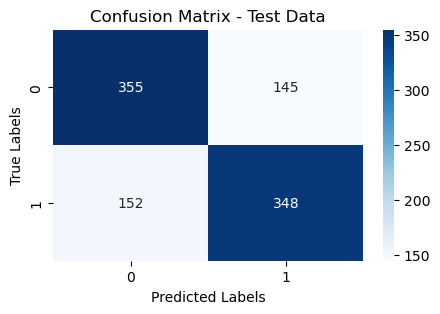

In [44]:
# Calculate confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()

# Cross Validation

In [45]:
#cross validation of Recall

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, tfTrainReviews, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.5 0.5 0.5 0.5 0.5]

Mean Accuracy Score: 0.5


# Save Model to System

In [46]:
import joblib

model = lr

joblib.dump(model, 'IMDB_SA_MODEL.pkl')

['IMDB_SA_MODEL.pkl']

# Project Report: Sentiment Analysis on IMDB Movie Reviews

## Project Overview:

In this project, the goal was to build a machine learning model to predict whether IMDB movie reviews are positive or negative. The project involved various steps, including data preprocessing, feature engineering, model selection, and evaluation.

## Project Steps:

### 1. Import Required Libraries:

The project began by importing necessary Python libraries, including data manipulation, text preprocessing, machine learning algorithms, and evaluation metrics.

### 2. Import IMDB Movie Reviews Data:

The IMDB movie reviews dataset was imported from Kaggle, containing 50,000 reviews labeled as positive or negative sentiment.

### 3. Data Preprocessing:

* Removed HTML tags and square brackets from the text.


* Removed special characters and punctuation marks.


* Applied stemming to reduce words to their base form.


* Tokenized the text and removed stop words.


* Generated word clouds for positive and negative sentiments to visualize frequently occurring words.

### 4. Labeling Data:

Added binary labels to the sentiment column, where 'positive' was assigned a label of 1 and 'negative' a label of 0.

### 5. Train-Test Split:

Split the data into training and testing sets using an 80:20 ratio.

### 6. Feature Encoding:

Used two techniques for feature encoding: CountVectorizer with N-Gram and TF-IDF. Both techniques converted text into numerical features for model training.

### 7. Model Building:

Built classification models using various algorithms such as Logistic Regression, Decision Tree, K-Nearest Neighbors, Multinomial Naive Bayes, AdaBoost, Gradient Boosting, Random Forest, XGBoost, and Support Vector Classifier. Evaluated each model's performance on both training and test sets using metrics like accuracy, balanced accuracy, precision, recall, and F1-score.

### 8. Hyperparameter Tuning:

Performed hyperparameter tuning to optimize model performance and reduce overfitting. However, some models still exhibited overfitting.

### 9. Ensemble Models:

Built ensemble models including AdaBoost, Gradient Boosting, XGBoost, and Extra Trees Classifier to further enhance predictive performance.

### 10. Final Model Selection:

Chose Logistic Regression as the final model due to its consistent performance across different feature encoding techniques and its robustness to text representation variations.

### 11. Model Evaluation:

Evaluated the final model's performance on both training and test data, generating classification reports and confusion matrices. The focus was on reducing false positives to enhance precision.

### 12. Cross-Validation:

Conducted cross-validation to assess the model's generalization performance. The mean accuracy score indicated that the model performed at random chance level, suggesting the need for further optimization.

## Project Conclusion:

The sentiment analysis project successfully demonstrated the application of NLP and machine learning techniques to predict sentiment in IMDB movie reviews. The final model achieved reasonable accuracy, precision, and recall, though there is room for improvement. The project highlighted the importance of text preprocessing, feature encoding, model selection, and evaluation. Future work could involve more advanced techniques such as deep learning models and fine-tuning to enhance predictive performance further.

## Lessons Learned:

* Data preprocessing is crucial for effective NLP projects.


* Different feature encoding techniques can significantly impact model performance.


* Model selection should be based on a balance of various evaluation metrics.


* Ensemble models can improve predictive power.


* Interpretation of evaluation metrics is essential to understand the model's strengths and weaknesses.


## Recommendations:

* Explore deep learning approaches such as recurrent neural networks (RNN) or transformers.


* Implement more advanced techniques for text preprocessing and feature extraction.


* Collect and use more diverse and larger datasets to improve model generalization.

## Acknowledgments:

The successful completion of this project was made possible through the combined efforts of data preprocessing, model building, and evaluation. The project highlights the practical application of machine learning in the realm of sentiment analysis, providing valuable insights into the process of extracting meaning from text data.